Finding the Two Best Markets to Advertise in an E-learning Product

In [76]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
print(survey.shape)
print(survey.head())

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN    

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
survey['JobRoleInterest'].value_counts(normalize = True)

Full-Stack Web Developer                                                                                                                                                        0.117706
  Front-End Web Developer                                                                                                                                                       0.064359
  Data Scientist                                                                                                                                                                0.021739
Back-End Web Developer                                                                                                                                                          0.020309
  Mobile Developer                                                                                                                                                              0.016733
Game Developer                                                             

In [78]:
Job_interests = survey['JobRoleInterest'].dropna()
Splitted_job_interests = Job_interests.str.split(',')
Number_of_options = Splitted_job_interests.apply(lambda x: len(x))
Number_of_options.value_counts(normalize = True).sort_index()

1     0.316505
2     0.108839
3     0.158896
4     0.152174
5     0.120423
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
11    0.001859
12    0.003003
13    0.000286
Name: JobRoleInterest, dtype: float64

In [79]:
Web_Mobile = Job_interests.str.contains('Web Developer|Mobile Developer')
Web_Mobile_freq = Web_Mobile.value_counts(normalize = True)

([<matplotlib.axis.XTick at 0x7f90bb9e86d8>,
 <a list of 2 Text xticklabel objects>)

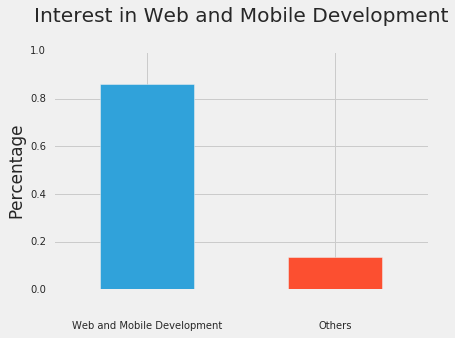

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
Web_Mobile_freq.plot.bar()
plt.title('Interest in Web and Mobile Development', y=1.1)
plt.ylabel('Percentage')
plt.ylim((0,1))
plt.xticks([0,1],['Web and Mobile Development', 'Others'], rotation=0, y=-0.1)

In [81]:
survey_cleaned = survey[survey['JobRoleInterest'].notnull()]
country_abs_freq = survey_cleaned['CountryLive'].value_counts()
country_rel_freq = survey_cleaned['CountryLive'].value_counts(normalize = True)
pd.DataFrame(data = {'absolute frequency': country_abs_freq, 'relative frequency': country_rel_freq})

,absolute frequency,relative frequency
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


In [82]:
survey_cleaned['MonthsProgramming'].replace(0, 1, inplace = True)
survey_cleaned['MoneyPerMonth'] = survey_cleaned['MoneyForLearning'] / survey_cleaned['MonthsProgramming']
survey_cleaned['MoneyPerMonth'].isnull().sum()

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


675

In [83]:
survey_cleaned = survey_cleaned[survey_cleaned['MoneyPerMonth'].notnull()]
survey_cleaned = survey_cleaned[survey_cleaned['CountryLive'].notnull()]
survey_country = survey_cleaned.groupby('CountryLive').mean()
big_4 = survey_cleaned[survey_cleaned['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


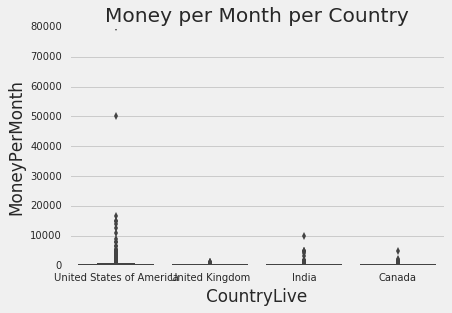

In [84]:
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = big_4)
plt.title('Money per Month per Country')

In [85]:
big_4 = big_4[big_4['MoneyPerMonth'] < 20000]

In [86]:
countries_mean = big_4.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


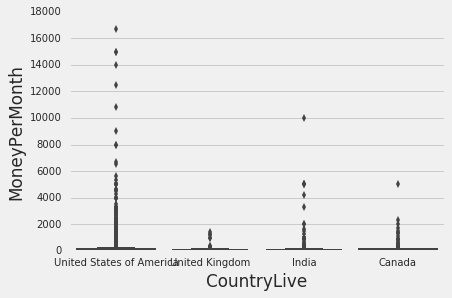

In [87]:
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = big_4)

In [88]:
big_4 = big_4.drop(big_4[(big_4['CountryLive'] == 'India') & (big_4['MoneyPerMonth'] >=2500)].index)
big_4 = big_4.drop(big_4[(big_4['CountryLive'] == 'United States of America') & (big_4['MoneyPerMonth'] >= 6000)].index)
big_4 = big_4.drop(big_4[(big_4['CountryLive'] == 'Canada') & (big_4['MoneyPerMonth'] >= 2500)].index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


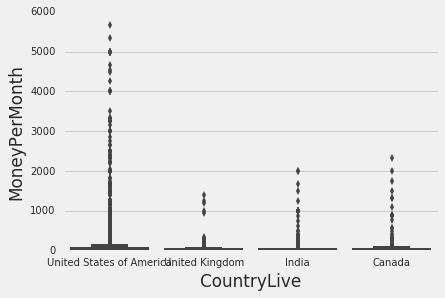

In [89]:
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = big_4)

In [90]:
big_4.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

In [91]:
big_4['CountryLive'].value_counts(normalize = True)

United States of America    0.749679
India                       0.117330
United Kingdom              0.071630
Canada                      0.061361
Name: CountryLive, dtype: float64

US is the first target.
India and Canada can be splitted as the second market.